In [1]:
train_dir = './emotion_face/train'
test_dir = './emotion_face/test'
image_size = 48

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(      width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator( rescale = 1./255,
                                         validation_split = 0.2)

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (image_size,image_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (image_size,image_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax



In [14]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(48,48,1)))

#1
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#2
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#3
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#4
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#5
model.add(Dense(7,activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-19 10:32:01.117903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 10:32:01.118435: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [16]:
epoch = 60
batch_size = 64
history = model.fit(x = train_generator,epochs = epoch, validation_data = validation_generator)

2022-07-19 10:33:44.657071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-19 10:33:44.658325: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/60


2022-07-19 10:33:45.010059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


359/359 [==============================] - ETA: 0s - loss: 2.2204 - accuracy: 0.2205

2022-07-19 10:34:20.095707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


359/359 [==============================] - 36s 86ms/step - loss: 2.2204 - accuracy: 0.2205 - val_loss: 7.3335 - val_accuracy: 0.1718
Epoch 2/60
359/359 [==============================] - 29s 82ms/step - loss: 1.9028 - accuracy: 0.2797 - val_loss: 1.7334 - val_accuracy: 0.3296
Epoch 3/60
359/359 [==============================] - 29s 81ms/step - loss: 1.7883 - accuracy: 0.3140 - val_loss: 1.5906 - val_accuracy: 0.3750
Epoch 4/60
359/359 [==============================] - 29s 80ms/step - loss: 1.6939 - accuracy: 0.3483 - val_loss: 1.5302 - val_accuracy: 0.4246
Epoch 5/60
359/359 [==============================] - 29s 82ms/step - loss: 1.6395 - accuracy: 0.3771 - val_loss: 1.5457 - val_accuracy: 0.4036
Epoch 6/60
359/359 [==============================] - 29s 81ms/step - loss: 1.5833 - accuracy: 0.3911 - val_loss: 1.4699 - val_accuracy: 0.4316
Epoch 7/60
359/359 [==============================] - 29s 81ms/step - loss: 1.5394 - accuracy: 0.4065 - val_loss: 1.4641 - val_accuracy: 0.4616
Epo

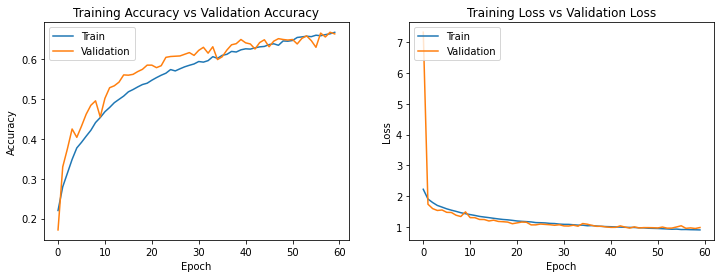

In [18]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [19]:
history1 = model.fit(x = train_generator,epochs = epoch, validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 30s 82ms/step - loss: 0.8854 - accuracy: 0.6678 - val_loss: 0.9678 - val_accuracy: 0.6641
Epoch 2/60
359/359 [==============================] - 30s 82ms/step - loss: 0.8758 - accuracy: 0.6712 - val_loss: 0.9825 - val_accuracy: 0.6564
Epoch 3/60
359/359 [==============================] - 29s 81ms/step - loss: 0.8760 - accuracy: 0.6732 - val_loss: 0.9715 - val_accuracy: 0.6543
Epoch 4/60
359/359 [==============================] - 29s 81ms/step - loss: 0.8702 - accuracy: 0.6752 - val_loss: 0.9456 - val_accuracy: 0.6634
Epoch 5/60
359/359 [==============================] - 29s 82ms/step - loss: 0.8740 - accuracy: 0.6714 - val_loss: 0.9799 - val_accuracy: 0.6578
Epoch 6/60
359/359 [==============================] - 29s 80ms/step - loss: 0.8629 - accuracy: 0.6764 - val_loss: 0.9819 - val_accuracy: 0.6620
Epoch 7/60
359/359 [==============================] - 29s 80ms/step - loss: 0.8535 - accuracy: 0.6821 - val_loss: 0.9596 - val_accuracy:

In [24]:
model.save('custom.h5')

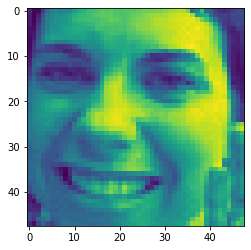

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img("./emotion_face/test/happy/PublicTest_77291754.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [33]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [34]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [35]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [31]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 22ms/step - loss: 0.9759 - accuracy: 0.6899
final train accuracy = 82.83 , validation accuracy = 68.99
